In [150]:
import numpy as np
import matplotlib.pyplot as plt
from pymatreader import read_mat
from scipy import signal
from lsfr import *

In [151]:
d = read_mat('matlab12.mat')
#gps_wvbb.mat has 10.23e6 sample rate
print(d.keys())
data = d['rxwaveform']

dict_keys(['__header__', '__version__', '__globals__', 'rxwaveform'])


In [152]:
prn= PRN(10)
p_r = np.repeat(prn, 10)

p_r_fft = np.fft.fft(p_r, data.shape[0])
p_r_fft = p_r_fft.conj()

In [153]:
#cv = np.convolve(p_r[::-1], data)
dfft = np.fft.fft(data)
cv = np.fft.ifft(dfft * p_r_fft)

2000.0


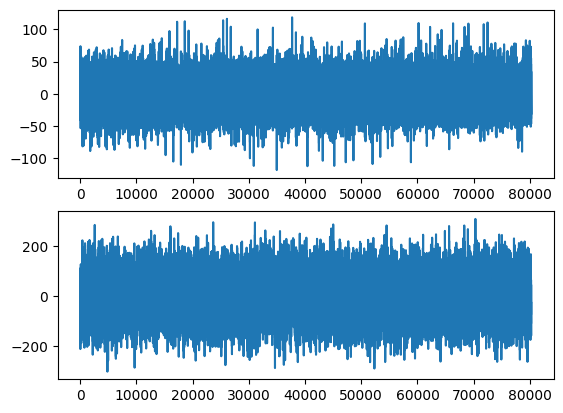

In [ ]:
print(data.shape[0]/10230)

sv = np.array([])

def downsample(input_arr, N, factor):
    k = 0
    M = int(N / factor)
    output_arr = np.zeros(M)
    for k in range(M):
        output_arr[k] = input_arr[int(k * factor + factor / 2)]
    return output_arr

ds_sig = 1j*downsample(np.imag(cv), cv.shape[0], 255) + downsample(np.real(cv), cv.shape[0], 255)

for i in range(cv.shape[0]//5115):
    x = (cv[(i*5115):((i+1)*5115)])
    max = np.max(x)
    min = np.min(x)
    sv = np.append(sv, max)

plt.subplot(2,1,1)
plt.plot(np.imag(ds_sig))
plt.subplot(2,1,2)
plt.plot(np.real(ds_sig))
plt.show()

